In [1]:
import pandas as pd

df = pd.read_csv("csv/Servers.csv")
df.head()


,timestamp,active_jobs_per_webserver,active_web_servers,active_jobs_spikeserver
0,0.044401,"[null, 1]",1.0,0.0
1,0.044401,it.pmcsn.lbsim.models.domain.LoadBalancer@1f3f...,NaN,NaN
2,0.050885,"[null, 2]",1.0,0.0
3,0.050885,it.pmcsn.lbsim.models.domain.LoadBalancer@1f3f...,NaN,NaN
4,0.070792,"[null, 1]",1.0,0.0


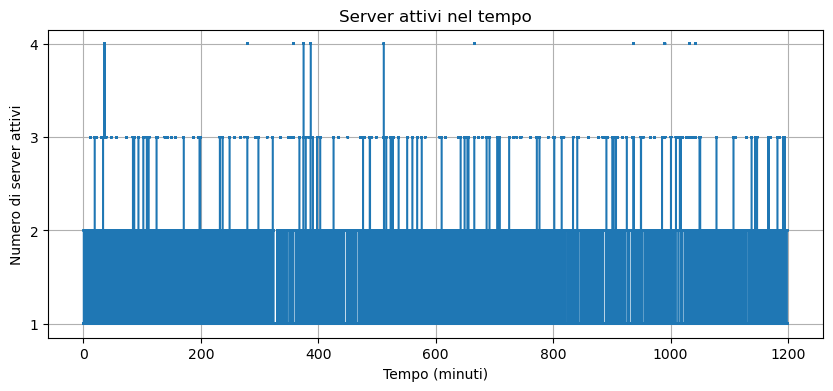

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
# Convertiamo i secondi in minuti
minutes = df["timestamp"] / 60.0

plt.step(minutes, df["active_web_servers"], where="post")
plt.xlabel("Tempo (minuti)")
plt.ylabel("Numero di server attivi")
plt.title("Server attivi nel tempo")
plt.grid(True)

# Assicura che le ordinate abbiano solo numeri interi
plt.yticks(range(int(df["active_web_servers"].min()), int(df["active_web_servers"].max()) + 1))

plt.show()


In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def parse_jobs_json(val):
    if pd.isna(val):
        return []
    s = str(val).strip()
    if s == "" or s.lower() == "nan":
        return []
    # parse JSON come ["null", 1] -> [None, 1]
    try:
        return json.loads(s)
    except json.JSONDecodeError:
        # fallback: prova a ripulire e riparsare
        return json.loads(s.replace("'", '"'))

# Assumo che df esista e abbia le colonne:
# - "timestamp"
# - "active_jobs_per_webserver" come stringhe "[null, 1, 3]" ecc.
df["jobs_list"] = df["active_jobs_per_webserver"].apply(parse_jobs_json)

# Numero max di server visti
max_servers = int(df["jobs_list"].apply(len).max() or 0)

# Espansione in colonne server_i (lasciando None se manca)
for i in range(max_servers):
    df[f"server_{i+1}_jobs"] = df["jobs_list"].apply(
        lambda lst: (lst[i] if i < len(lst) else None)
    )

# Timestamp → minuti
minutes = df["timestamp"] / 60.0

# Plot (linee si interrompono dove c'è None)
plt.figure(figsize=(12, 6))
for i in range(max_servers):
    plt.plot(minutes, df[f"server_{i+1}_jobs"], label=f"Server {i+1}")

plt.xlabel("Tempo (minuti)")
plt.ylabel("Job per server")
plt.title("Evoluzione job per ogni webserver")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# Carichiamo il file CSV in dfJobs (usa direttamente le intestazioni del file)
dfJobs = pd.read_csv("csv/Jobs.csv")

# Calcolo della media cumulata dei response time
dfJobs["cumulative_avg"] = dfJobs["ResponseTime"].expanding().mean()

# Mostriamo un estratto per verifica
print(dfJobs[["Departure", "ResponseTime", "cumulative_avg"]].head())

# Grafico
plt.figure(figsize=(8,5))
plt.plot(dfJobs["Departure"], dfJobs["cumulative_avg"], marker="o", linestyle="-")
plt.xlabel("Tempo")
plt.ylabel("Cumulative average response time")
plt.title("Andamento della media cumulata dei response time")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Carica CSV senza header
df = pd.read_csv("csv/Servers.csv", header=None, names=[
    "timestamp", "active_jobs_per_webserver", "active_web_servers", "spike_jobs"
])

# Parser della colonna con la lista
def parse_jobs(val):
    if pd.isna(val):
        return []
    s = str(val).strip()
    if s == "" or s.lower() == "nan":
        return []
    try:
        return json.loads(s)          # "[null,3]" → [None, 3]
    except Exception:
        return []

df["jobs_list"] = df["active_jobs_per_webserver"].apply(parse_jobs)

# Numero massimo di server che compaiono
max_servers = int(df["jobs_list"].apply(len).max() or 0)

# Espansione in colonne server_1, server_2, ...
for i in range(max_servers):
    df[f"server_{i+1}_jobs"] = df["jobs_list"].apply(
        lambda lst: lst[i] if i < len(lst) else None
    )

# Converte timestamp in minuti
minutes = df["timestamp"] / 60.0
